# 1
Сгенерируйте линейно разделимый датасет для классификации из двух признаков. Постройте на нем опорно-векторный классификатор без ядра с параметром С=100. Изобразите границу принятия решения и линию зазора на графике.

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR, LinearSVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, fetch_california_housing, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [15]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)


SVC(C=100, kernel='linear')

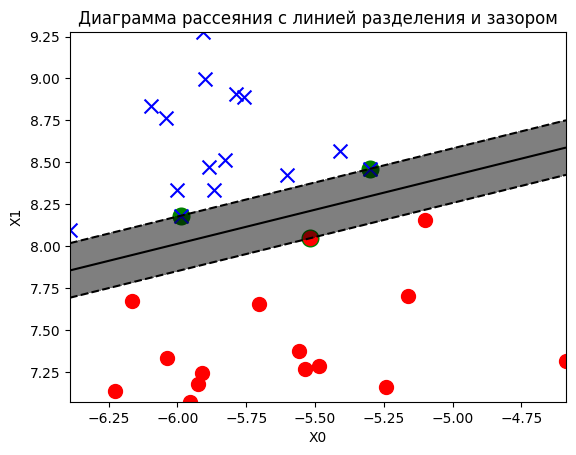

In [16]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()
plot_decision_regions(X, y, svm_linear)

In [22]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
svm_linear1 = SVC(kernel='linear', C=10)
svm_linear1.fit(X, y)

SVC(C=10, kernel='linear')

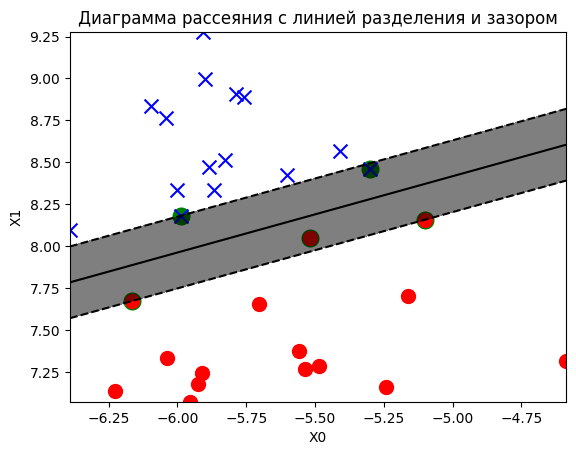

In [23]:
plot_decision_regions(X, y, svm_linear1)

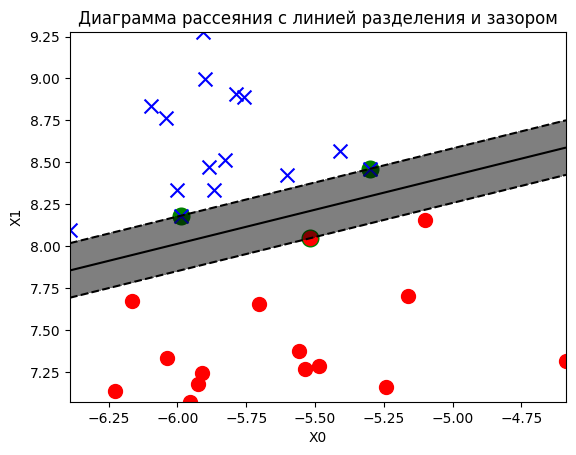

In [25]:
svm_linear2 = SVC(kernel='linear', C=500)
svm_linear2.fit(X, y)
plot_decision_regions(X, y, svm_linear2)

2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

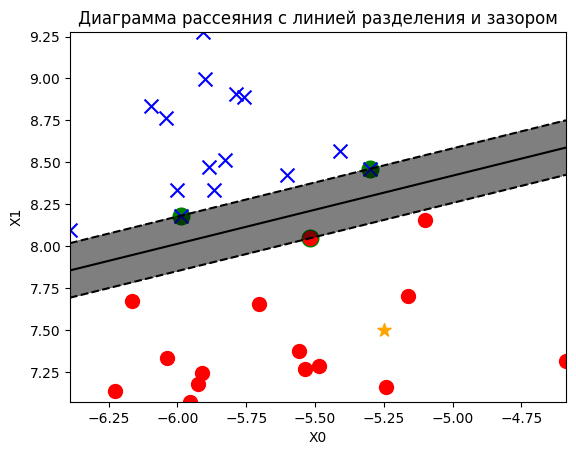

[-5.03131797] [0]


In [32]:
y_pred =  svm_linear.predict(X)
observation1 = [[-5.25, 7.5]]
plt.scatter(observation1[0][0], observation1[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)
print(svm_linear.decision_function(observation1), svm_linear.predict(observation1))

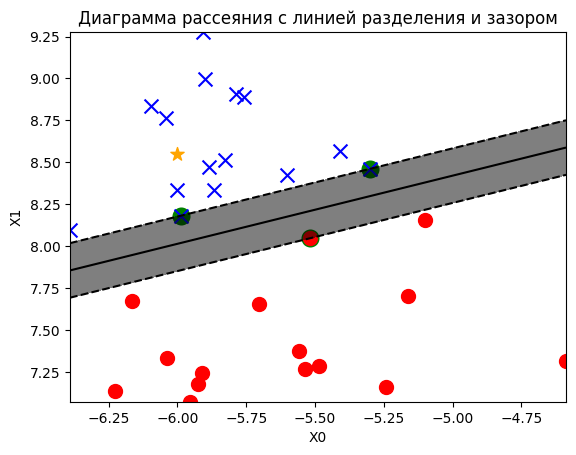

[3.29726146] [1]


In [33]:
observation2 = [[-6, 8.55]]
plt.scatter(observation2[0][0], observation2[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)
print(svm_linear.decision_function(observation2), svm_linear.predict(observation2))

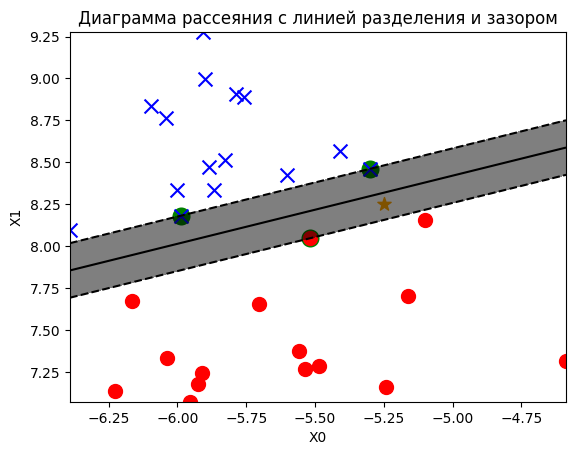

[-0.42119405] [0]


In [34]:
observation3 = [[-5.25, 8.25]]
plt.scatter(observation3[0][0], observation3[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)
print(svm_linear.decision_function(observation3), svm_linear.predict(observation3))

# 2
Сгенерируйте линейно неразделимый датасет с зазором между классами. Повторите виуальный анализ на нем.

1. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

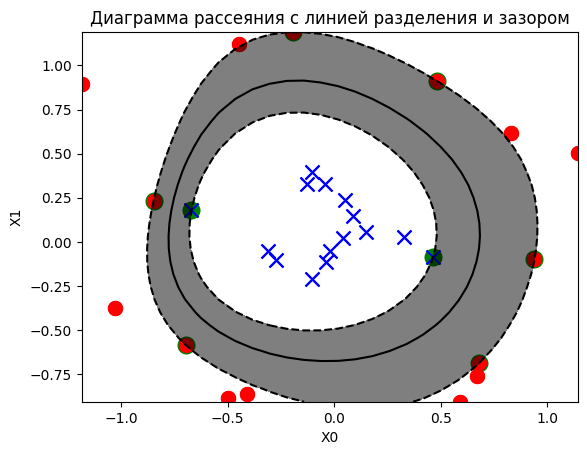

In [51]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)

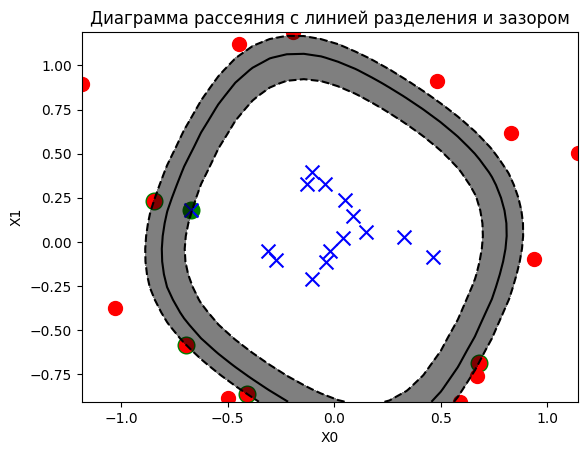

In [52]:
svm_poly = SVC(kernel='poly',degree=4, C=1000).fit(X, y)
plot_decision_regions(X, y, svm_poly)

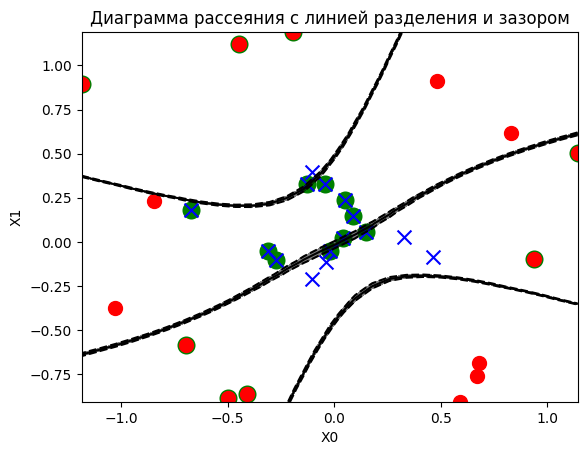

In [53]:
svm_sigmoid = SVC(kernel='sigmoid', C=100).fit(X, y)
plot_decision_regions(X, y, svm_sigmoid)

# 3
Сгенерируйте неразделимый датасет так, чтобы классы пересекались. Повторите построение и оценку метода опорных векторов на нем.

1. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

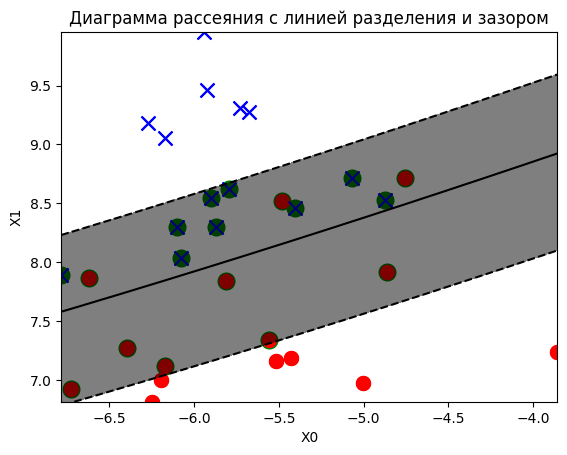

In [62]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)
plot_decision_regions(X, y, svm_poly)

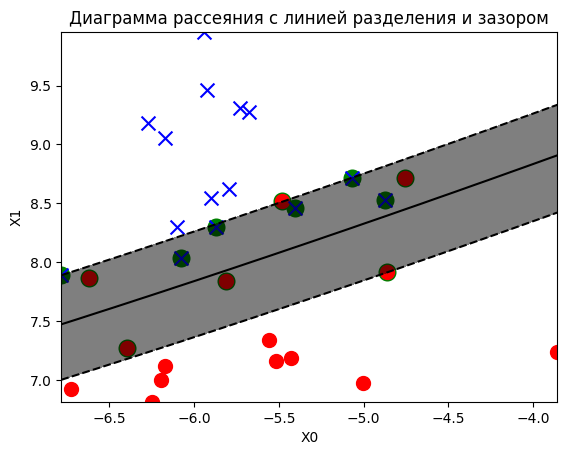

In [44]:
svm_poly1 = SVC(kernel='poly', degree=4, C=15).fit(X, y)
plot_decision_regions(X, y, svm_poly1)

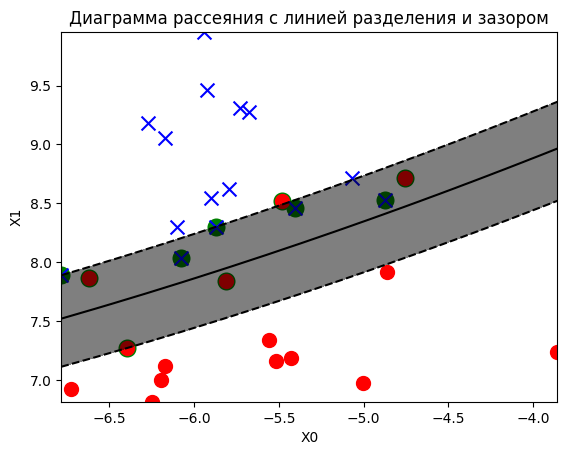

In [45]:
svm_poly2 = SVC(kernel='poly', degree=4, C=100).fit(X, y)
plot_decision_regions(X, y, svm_poly2)

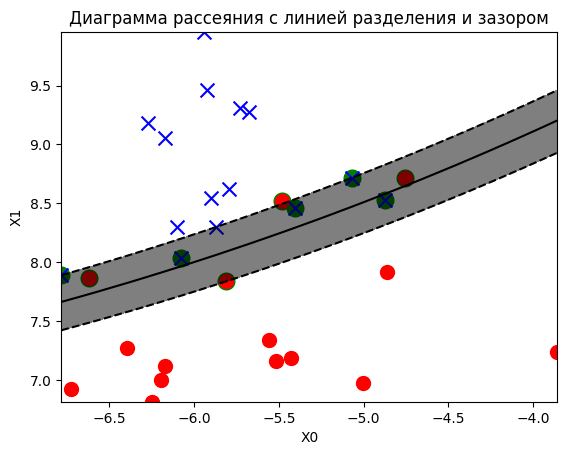

In [46]:
svm_poly3 = SVC(kernel='poly', degree=4, C=500).fit(X, y)
plot_decision_regions(X, y, svm_poly3)

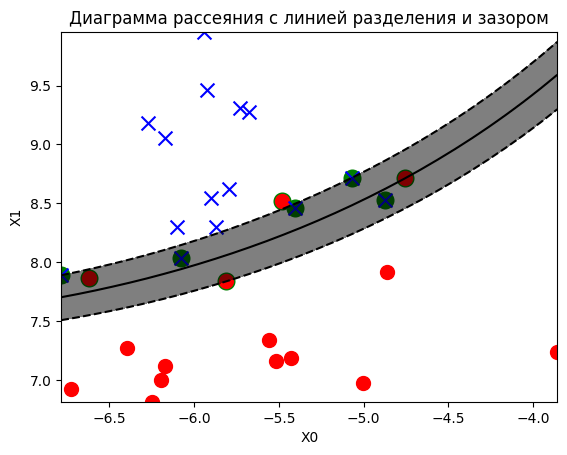

In [47]:
svm_poly4 = SVC(kernel='poly', degree=4, C=1500).fit(X, y)
plot_decision_regions(X, y, svm_poly4)

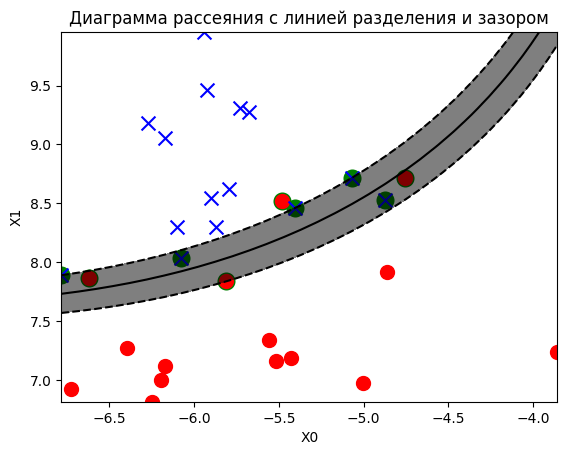

In [49]:
svm_poly5 = SVC(kernel='poly', degree=4, C=10000).fit(X, y)
plot_decision_regions(X, y, svm_poly5)

5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

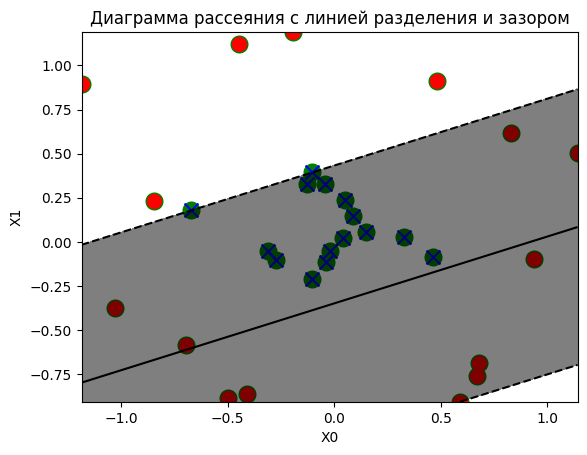

In [54]:
svm_linear = SVC(kernel='linear',  C=150).fit(X, y)
plot_decision_regions(X, y, svm_linear)

In [58]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, y)
LinearSVC()

LinearSVC()

6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

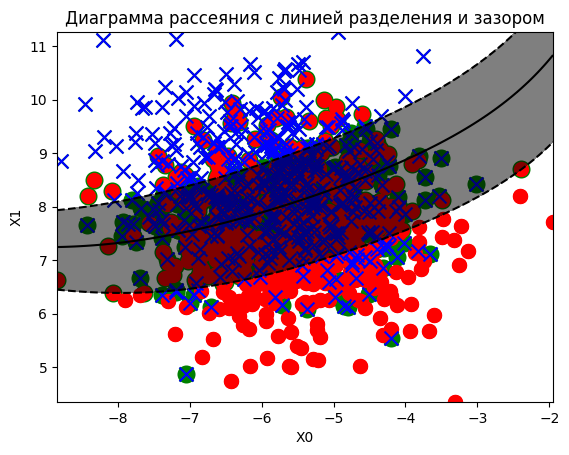

In [67]:
X, y = make_blobs(n_features=2, n_samples=1000, centers=2, random_state=5, cluster_std=1)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='g', s=100)
svm_poly = SVC(kernel='poly', degree=4, C=10000).fit(X, y)
plot_decision_regions(X, y, svm_poly)

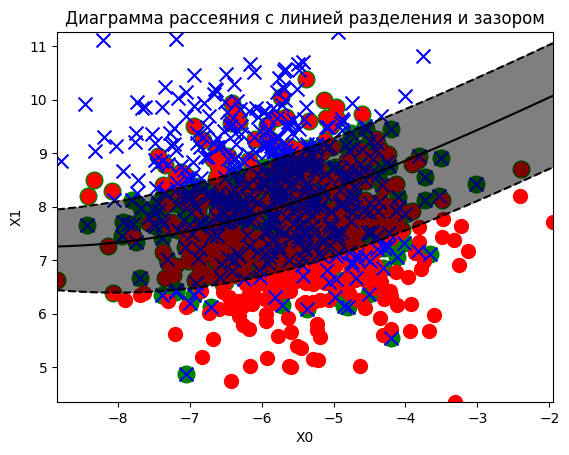

In [68]:
svm_poly = SVC(kernel='poly',degree=4, C=1000).fit(X, y)
plot_decision_regions(X, y, svm_poly)

с таким колличеством точек любой метод кажется бесполезным

7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

с 1000 точек и моим ноутбуком занимает пару минут

8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

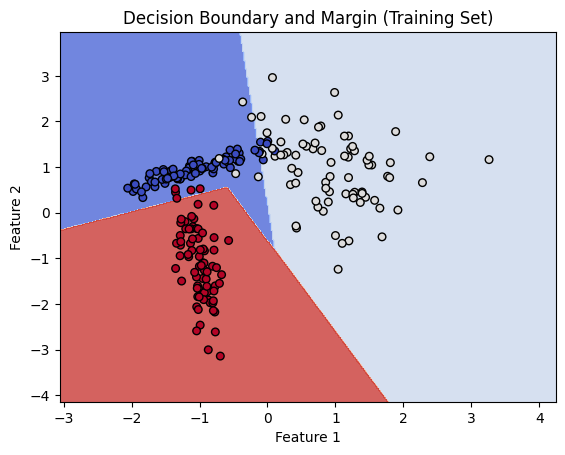

Accuracy on Test Set: 0.90


In [77]:
X, y = datasets.make_classification(n_samples=300, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=3, n_clusters_per_class=1,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=30)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_train, y_train, svm_model, 'Decision Boundary and Margin (Training Set)')

accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy on Test Set: {accuracy:.2f}")

9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [79]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model_iris = SVC(kernel='linear', C=1)
svm_model_iris.fit(X_train, y_train)

y_pred = svm_model_iris.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Точность на тестовом наборе: {accuracy:.2f}")
print("Матрица ошибок:")
print(conf_matrix)

Точность на тестовом наборе: 1.00
Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [ ]:
california_housing = fetch_california_housing()
X_regression = california_housing.data
y_regression = california_housing.target

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)
svm_model_regression_california = SVR(kernel='linear', C=1)
svm_model_regression_california.fit(X_train_regression, y_train_regression)

y_pred_regression_california = svm_model_regression_california.predict(X_test_regression)

mse_california = mean_squared_error(y_test_regression, y_pred_regression_california)
r2_california = r2_score(y_test_regression, y_pred_regression_california)

print(f"Среднеквадратическая ошибка на тестовом наборе: {mse_california:.2f}")
print(f"Коэффициент детерминации на тестовом наборе: {r2_california:.2f}")